In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv("/kaggle/input/ecommerce-events-history-in-electronics-store/events.csv")

In [2]:
data = data.dropna()
data.head(3)

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
1,2020-09-24 11:57:26 UTC,view,139905,2144415926932472027,computers.components.cooler,zalman,17.16,1515915625519380411,tdicluNnRY
3,2020-09-24 11:57:33 UTC,view,635807,2144415923107266682,computers.peripherals.printer,pantum,113.81,1515915625519014356,aGFYrNgC08
5,2020-09-24 11:57:59 UTC,view,664325,2144415951611757447,construction.tools.saw,carver,52.33,1515915625519388062,vnkdP81DDW


In [3]:
temp = data.isna().sum()/885129
temp[temp>0]

Series([], dtype: float64)

In [3]:
def extract_year(str_in):
    return int(str_in[:4])
def extract_month(str_in):
    return int(str_in[5:7])
def extract_tz(str_in):
    return str_in[-3:]
def clean_date(str_in):
    return str_in[:10]
def year_month(str_in):
    return str_in[:7]

data['timezone'] = data['event_time'].apply(extract_tz)
data['month'] = data['event_time'].apply(extract_month)
data['year'] = data['event_time'].apply(extract_year)
data['date'] = data['event_time'].apply(clean_date) 
data['year_month'] = data['event_time'].apply(year_month)
data.head(3)

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,timezone,month,year,date,year_month
1,2020-09-24 11:57:26 UTC,view,139905,2144415926932472027,computers.components.cooler,zalman,17.16,1515915625519380411,tdicluNnRY,UTC,9,2020,2020-09-24,2020-09
3,2020-09-24 11:57:33 UTC,view,635807,2144415923107266682,computers.peripherals.printer,pantum,113.81,1515915625519014356,aGFYrNgC08,UTC,9,2020,2020-09-24,2020-09
5,2020-09-24 11:57:59 UTC,view,664325,2144415951611757447,construction.tools.saw,carver,52.33,1515915625519388062,vnkdP81DDW,UTC,9,2020,2020-09-24,2020-09


In [4]:
asus = data[data['brand']=="asus"][['event_type', 'product_id', 'category_id', 'category_code', 'price', 'user_id', 'user_session', 'date', 'year_month']]
asus.shape

(27221, 9)

In [6]:
asus.nunique().sort_values() 

event_type           3
year_month           6
category_code       17
category_id         28
date               158
price              507
product_id         544
user_id          11802
user_session     14607
dtype: int64

<AxesSubplot:title={'center':'Top 5 most viewed Categories within Asus'}, xlabel='Categories', ylabel='Count of Views'>

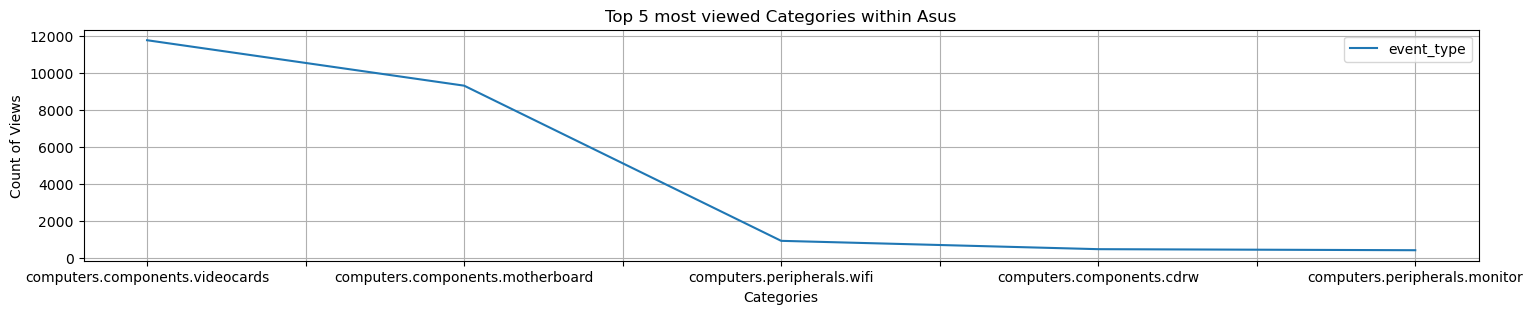

In [7]:
asus_cat = asus[asus['event_type'] == 'view'][['category_code', 'event_type']].groupby(['category_code']).count().sort_values(by='event_type', ascending = False).reset_index()[:5]
asus_cat.plot(x='category_code', y='event_type', kind = 'line', rot = 0, title = 'Top 5 most viewed Categories within Asus', xlabel = 'Categories', ylabel = 'Count of Views', figsize = (18, 3), grid = True)

In [8]:
data[data['category_code'] == 'computers.components.videocards']['brand'].unique()

array(['asus', 'dell', 'gigabyte', 'sapphire', 'palit', 'msi',
       'powercolor', 'pny', 'hp'], dtype=object)

<AxesSubplot:title={'center':'Popularity trend for Category Code: computers > components > videocards'}, xlabel='Competitor Brands for Asus', ylabel='Count of Total Interaction'>

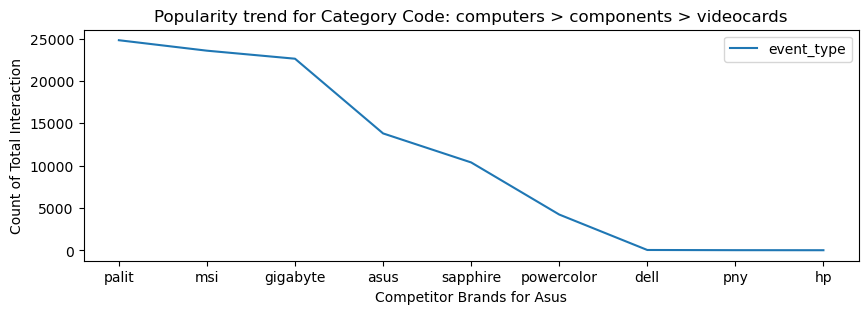

In [9]:
temp01 = data[data['category_code'] == 'computers.components.videocards'][['brand', 'event_type']].groupby('brand').count().sort_values(by='event_type', ascending = False).reset_index()
temp01.plot(x='brand', y='event_type', kind='line', figsize = (10, 3), title = 'Popularity trend for Category Code: computers > components > videocards', ylabel='Count of Total Interaction', xlabel='Competitor Brands for Asus')

In [5]:
asus_vc = asus[asus['category_code']=="computers.components.videocards"]
asus_vc.nunique().sort_values() 

category_id         1
category_code       1
event_type          3
year_month          6
date              158
price             159
product_id        165
user_id          5164
user_session     6752
dtype: int64

In [6]:
asus_vc = asus[asus['category_code']=="computers.components.videocards"][['event_type', 'year_month', 'date', 'price', 'product_id', 'user_id', 'user_session']]
asus_vc.nunique().sort_values() 

event_type         3
year_month         6
date             158
price            159
product_id       165
user_id         5164
user_session    6752
dtype: int64

In [7]:
asus_vc['event_type'].value_counts()[:3]

view        11782
cart         1311
purchase      716
Name: event_type, dtype: int64

In [8]:
asus_vc['year_month'].value_counts()[:3]

2021-01    4884
2021-02    4450
2020-12    1909
Name: year_month, dtype: int64

In [9]:
asus_vc['date'].value_counts()[:10]

2021-02-13    220
2021-01-19    218
2021-01-26    213
2021-01-11    201
2021-01-23    200
2021-01-22    200
2021-01-25    198
2021-01-09    196
2021-01-10    196
2021-02-15    194
Name: date, dtype: int64

In [10]:
asus_vc['product_id'].value_counts()[:3]

387956     1483
3961719    1409
4101569     935
Name: product_id, dtype: int64

In [11]:
asus_vc['user_id'].value_counts()[:3]

1515915625596734979    222
1515915625593948004     96
1515915625594475859     76
Name: user_id, dtype: int64

In [12]:
asus_vc['user_session'].value_counts()[:3]

651c519c-a50d-4ad1-b95e-c7867751dd51    49
qkVkgX6mDz                              44
6lnJx9TUzD                              39
Name: user_session, dtype: int64

In [18]:
# asus_vc[asus_vc['user_session']=='651c519c-a50d-4ad1-b95e-c7867751dd51']
# price = 187.29, product_id - 4100254, user_id = 1515915625427437146

In [16]:
userid_select = data[data['user_session']=='651c519c-a50d-4ad1-b95e-c7867751dd51']
userid_select['user_id'].value_counts()

1515915625427437146    54
Name: user_id, dtype: int64

In [17]:
asus_vc2 = asus_vc[asus_vc['user_session']=='651c519c-a50d-4ad1-b95e-c7867751dd51']
asus_vc2['user_id'].value_counts()

1515915625427437146    49
Name: user_id, dtype: int64

In [15]:
userid_select = data[data['user_session']=='qkVkgX6mDz']
userid_select['user_id'].value_counts()

1515915625596703281    86
Name: user_id, dtype: int64

In [21]:
userid_select['date'].value_counts()

2021-01-30    13
2021-01-31    13
2021-02-04    13
2021-01-25     9
2021-02-01     8
2021-02-02     6
2021-02-03     6
2021-01-27     5
2021-01-28     4
2021-01-26     3
2021-01-29     3
2021-01-24     2
2021-02-05     1
Name: date, dtype: int64

In [43]:
userid_select['brand'].value_counts()

asus           44
amd            28
sapphire        5
palit           3
berkut          2
ginzzu          1
accord          1
thermaltake     1
gigabyte        1
Name: brand, dtype: int64

In [42]:
userid_select['event_type'].value_counts()

view        65
cart        19
purchase     2
Name: event_type, dtype: int64